In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from string import punctuation
from nltk.corpus import stopwords

%matplotlib inline

Suppress Pandas' automatic conversion of utc column to scientific notation:

In [31]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [13]:
!ls

Project Fletcher Proposal.pdf reddit-ETL.ipynb
README.md                     results.csv
Untitled.ipynb                seinfeld-chronicles
Untitled1.ipynb               showerthoughts.csv
darkweb-EDA.ipynb             test_csv.csv.


In [37]:
df = pd.read_csv('showerthoughts.csv')

In [33]:
len(df[df.score > 1]) / len(df)

0.392702

39% of submissions get more than one upvote. This makes "greater than one upvote" a good candidate for our criteria for a good post.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
author          1000000 non-null object
title           1000000 non-null object
subreddit       1000000 non-null object
score           1000000 non-null int64
num_comments    1000000 non-null int64
retrieved_on    1000000 non-null int64
id              1000000 non-null object
created_utc     1000000 non-null int64
selftext        591622 non-null object
dtypes: int64(4), object(5)
memory usage: 68.7+ MB


In [27]:
1.488331e+09

1488331000.0

In [25]:
df['created_utc'].describe()

count    1.000000e+06
mean     1.488331e+09
std      2.760932e+07
min      1.448928e+09
25%      1.464054e+09
50%      1.481319e+09
75%      1.516312e+09
max      1.538352e+09
Name: created_utc, dtype: float64

In [24]:
df['created_utc'].sample(50)

974654    1460242249
288566    1521628631
937006    1458172051
971627    1487124774
202176    1488623673
673683    1456435678
251694    1531561617
349431    1459562655
464993    1471551935
297893    1521596759
258668    1491915607
336644    1492289293
918674    1517987680
471945    1516567360
156915    1475754237
190915    1454487587
191325    1480641359
838077    1480453355
807965    1470410977
512077    1527283268
553303    1526575809
48811     1491069608
677746    1482324419
836567    1482551938
631051    1451464810
350134    1475508395
69349     1489465061
812656    1520871620
191900    1463598149
559039    1522433041
490269    1536891704
42133     1464958858
639626    1453412437
607123    1493060202
822216    1492231518
833404    1470363418
794743    1460470133
43857     1534256826
286474    1492642389
167799    1491434859
203519    1453168471
954886    1521408886
962310    1456399927
988051    1516146942
150552    1454939134
526792    1531256819
659571    1536873112
799985    153

In [39]:
df['created_utc']

0         1463006328
1         1464437036
2         1464398463
3         1462264235
4         1463768968
5         1463818100
6         1462339275
7         1462893634
8         1464194421
9         1464563622
10        1462850501
11        1464099692
12        1463145496
13        1463969786
14        1462867893
15        1463141251
16        1463069083
17        1463329142
18        1464054024
19        1462443170
20        1463370239
21        1463823241
22        1464227645
23        1464367685
24        1464706379
25        1464668677
26        1462694698
27        1463608432
28        1464201614
29        1463979154
             ...    
999970    1482081289
999971    1449325801
999972    1455190895
999973    1536862595
999974    1515051785
999975    1480603272
999976    1466499678
999977    1490307638
999978    1533601136
999979    1516765931
999980    1517960893
999981    1537518386
999982    1461285846
999983    1532951102
999984    1462927278
999985    1517512508
999986    146

In [41]:
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [47]:
df.head()

,author,title,subreddit,score,num_comments,retrieved_on,id,created_utc,selftext
0,os_coxae,"Everyone that's ever said ""I'm speechless"" is ...",Showerthoughts,0,0,1466445837,4ixl2n,2016-05-11 22:38:48,NaN
1,Calrizle,I wonder how many people I've talked to who ha...,Showerthoughts,0,0,1466494743,4lfjxn,2016-05-28 12:03:56,NaN
2,[deleted],"""Palindrome"" is a let down as a word. Rhinopla...",Showerthoughts,0,0,1466493929,4ldt85,2016-05-28 01:21:03,[deleted]
3,[deleted],"When you tell someone to keep a secret, it is ...",Showerthoughts,0,0,1466423373,4hmcbg,2016-05-03 08:30:35,[deleted]
4,[deleted],"Someone had the the time to create the words, ...",Showerthoughts,0,0,1466474842,4k9ngz,2016-05-20 18:29:28,[deleted]


In [56]:
pd.set_option('display.max_colwidth', 999)

In [58]:
df[df.score > 15000].sort_values(by='score', ascending=False)[['title', 'score']]

,title,score
991644,"College students don't want to go to graduation ceremonies, but they go to please their relatives, while relatives don't want to go but go to support the students; we should all just be honest and skip that ceremony and go out for pizza.",119052
962154,"The sentence ""Don't objectify women"" has ""women"" as the object of the sentence.",117934
998335,Being 35 and not wanting to work in the field for which you've prepared is like being half way through an RPG and realizing you've built out your skill tree all wrong and you can't respec and you can't make a new character and there will never be another video game again,117154
995932,"A guy named ""Weird Al"" has had a 40+ year long career with no allegations of sexual impropriety.",115008
999607,"The olympics is the only time when you hear ""Great execution by North Korea"" and it seems okay.",113782
988823,"This ""Spring Forward"" thing would be a lot more popular if we moved the clocks ahead at 2PM on Monday.",109257
999627,"If we rebranded ""Sunburns"" as ""Radiation burns"" people would take the dangers more seriously.",103607
997418,If you place a humidifier and a dehumidifier in the same room you can wirelessly transmit water,98755
998236,"Tinder is the opposite of porn site advertisements. There actually are a ton of hot singles in my area, but none of them are interested in me.",97392
999745,"I'm not a millennial, but if I was I'd be damn tired of another article every other day with a new theory about who millennials are and what they want.",95105


In [61]:
df.sample(50)

,author,title,subreddit,score,num_comments,retrieved_on,id,created_utc,selftext
50816,[deleted],The ability to filter r/all has completely saved Reddit for me.,Showerthoughts,0,0,1484298963,5g7e1f,2016-12-03 02:28:01,[deleted]
299456,[deleted],The only time you're likely to battle a gym trainer and win is when playing pokemon.,Showerthoughts,1,0,1518580889,7ssa8n,2018-01-25 01:30:30,[removed]
891539,JasonlsBored,"Being tired at night is normal, being tired during the day is bad.",Showerthoughts,1,6,1536778063,98mfqt,2018-08-19 18:36:56,NaN
569514,Lee_power,"Five years ago, if I put ""I'm gay"" as my Facebook status, people would think it was a friend messing with my account. Now, if I post the same thing, I will get comments upon comments about how brave I am for coming out and tons of support.",Showerthoughts,2,1,1455022699,426mxl,2016-01-22 17:45:52,NaN
409195,mike0sd,"It's National Dog Day today, today is THE dog day of summer.",Showerthoughts,5,0,1536810241,9ahqel,2018-08-26 18:26:27,NaN
531596,bananen5,Is the liquid that come the women when the ”water broke” the same as when they are wet?,Showerthoughts,1,1,1522278075,834xde,2018-03-09 07:26:23,[removed]
191929,cmad182,Why aren't female King Cobras called Queen Cobras?,Showerthoughts,1,0,1466434359,4i9fbt,2016-05-07 09:45:27,[removed]
186967,professorpokeman,"The sequel to ""Pokemon sun and moon"" should come full circle and be called ""Pokemon star"".",Showerthoughts,1,0,1473010027,4vrwo6,2016-08-02 11:13:42,[removed]
359537,DarthFarious,I wonder how it feels to not see the same posts reworded again and again.,Showerthoughts,2,0,1459204323,46vy1i,2016-02-21 16:31:10,NaN
922101,martinber123,"100 years ago, everyone had a horse, and the rich had cars. Today, everyone has a car, and the rich have horses.",Showerthoughts,30,7,1484194734,5arif8,2016-11-02 18:11:21,NaN


In [59]:
df_nlp = df.copy()

In [60]:
df_nlp

array(['author', 'title', 'subreddit', 'score', 'num_comments',
       'retrieved_on', 'id', 'created_utc', 'selftext'], dtype=object)

In [64]:
df_nlp['title'] = df_nlp['title'].str.lower()

In [83]:
df_nlp.sample()

,author,title,subreddit,score,num_comments,retrieved_on,id,created_utc,selftext
859380,[deleted],"if universe is infinite then by killing half the universe; thanos killed all of it, as infinity/2 = infinity.",Showerthoughts,0,5,1529711801,8iu7d3,2018-05-12 06:02:18,[deleted]


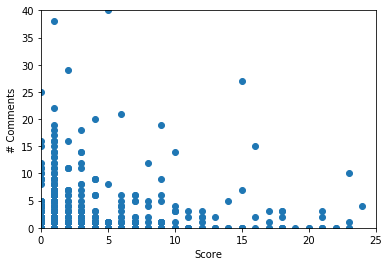

In [92]:
plt.scatter(df.score.sample(1000), df.num_comments.sample(1000))
plt.xlabel('Score')
plt.ylabel('# Comments')
plt.xlim([0, 25])
plt.ylim([0, 40]);

In [96]:
def strip_punc(s):
    return ''.join(c for c in s if c not in punctuation)

In [98]:
df_nlp['title'] = df_nlp['title'].apply(lambda x: strip_punc(x))

In [99]:
df_nlp['title'] = df_nlp['title'].str.replace('[0-9]', '')

In [102]:
stop_words = set(stopwords.words('english'))

In [103]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r